Lookup table length: 256


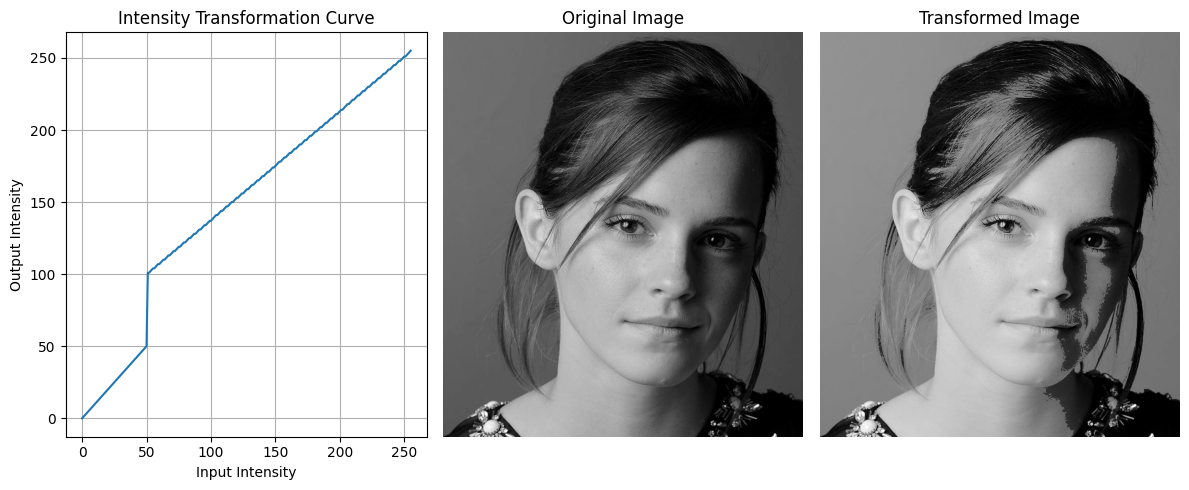

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# --------------------
# 1. Define control points for transformation
# --------------------
# Format: (input_intensity, output_intensity)
c = np.array([(50, 50), (50, 100)])  # Example breakpoints from Fig. 1a

# --------------------
# 2. Build the lookup table
# --------------------
t1 = np.linspace(0, c[0,1], c[0,0] + 1).astype('uint8')  # 0 → 100 maps to 0 → 50
t2 = np.linspace(c[0,1] + 1, c[1,1], c[1,0] - c[0,0]).astype('uint8')  # 101 → 150 maps to 51 → 200
t3 = np.linspace(c[1,1] + 1, 255, 255 - c[1,0]).astype('uint8')  # 151 → 255 maps to 201 → 255

transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')

print("Lookup table length:", len(transform))  # Should be 256

# --------------------
# 3. Read the image (grayscale)
# --------------------
img_orig = cv.imread('assets/emma.jpg', cv.IMREAD_GRAYSCALE)

# --------------------
# 4. Apply LUT transformation
# --------------------
image_transformed = cv.LUT(img_orig, transform)

# --------------------
# 5. Plot transformation curve
# --------------------
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.plot(np.arange(256), transform)
plt.title("Intensity Transformation Curve")
plt.xlabel("Input Intensity")
plt.ylabel("Output Intensity")
plt.grid(True)

# --------------------
# 6. Show original and transformed images
# --------------------
plt.subplot(1,3,2)
plt.imshow(img_orig, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(image_transformed, cmap='gray')
plt.title("Transformed Image")
plt.axis('off')

plt.tight_layout()
plt.show()



